In [2]:
#title dir-change
import os
folder_path = "MH_Algorithms"
os.chdir(folder_path)
os.listdir()

['.ipynb_checkpoints',
 'de.py',
 'fpa.py',
 'functionHO.py',
 'pso.py',
 'sca.py',
 '__pycache__']

In [3]:
#necessary imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [24]:
#load training data:: UNSW_NB15_training-set.csv
data_read = pd.read_csv('../datasets/UNSW_NB15_training-set.csv')

data_read.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [26]:
#drop 'id', 'attack_cat', 'label' columns
data_1 = data_read
data_1 = data_1.drop(['id',  'label'], axis = 1)

#convert 'proto', 'state' and 'service' column values to numeric values
le = LabelEncoder()
proto = le.fit_transform(data_1['proto'])
data_1.drop("proto", axis=1, inplace=True)
data_1["proto"] = proto

state = le.fit_transform(data_1['state'])
data_1.drop("state", axis=1, inplace=True)
data_1["state"] = state

service = le.fit_transform(data_1['service'])
data_1.drop("service", axis=1, inplace=True)
data_1["service"] = service

attack_cat = le.fit_transform(data_1['attack_cat'])
data_1.drop("attack_cat", axis=1, inplace=True)
data_1["attack_cat"] = attack_cat

data_1.head(10)

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,proto,state,service,attack_cat
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,0,0,0,1,1,0,113,2,0,6
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,0,0,0,1,6,0,113,2,0,6
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,0,0,0,2,6,0,113,2,0,6
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,1,1,0,2,1,0,113,2,3,6
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,0,0,0,2,39,0,113,2,0,6
5,0.380537,10,6,534,268,39.417980,254,252,10112.025390,4709.134766,...,0,0,0,2,39,0,113,2,0,6
6,0.637109,10,8,534,354,26.683033,254,252,6039.783203,3892.583740,...,0,0,0,1,39,0,113,2,0,6
7,0.521584,10,8,534,354,32.593026,254,252,7377.527344,4754.747070,...,0,0,0,3,39,0,113,2,0,6
8,0.542905,10,8,534,354,31.313031,254,252,7087.796387,4568.018555,...,0,0,0,3,39,0,113,2,0,6
9,0.258687,10,6,534,268,57.985135,254,252,14875.120120,6927.291016,...,0,0,0,3,39,0,113,2,0,6


In [27]:
data_1['attack_cat']

0         6
1         6
2         6
3         6
4         6
         ..
175336    5
175337    8
175338    5
175339    5
175340    5
Name: attack_cat, Length: 175341, dtype: int32

In [6]:
#take only the values without column names
data_1 = data_1.values
train_feat = np.asarray(data_1[:, :])

#process only labels
data_2 = data_read.values
train_label = np.asarray(data_2[:, -1])
train_label = train_label.astype('int')

#perform data normalization
scaler = preprocessing.StandardScaler().fit(train_feat)
train_minmax_feat = scaler.transform(train_feat)

**Test Data Process**

In [7]:
#load test data:: UNSW_NB15_testing-set.csv
test_data_read = pd.read_csv('../datasets/UNSW_NB15_testing-set.csv')

#drop 'id', 'attack_cat', 'label' columns
test_data_1 = test_data_read
test_data_1 = test_data_1.drop(['id', 'attack_cat', 'label'], axis = 1)

#convert 'proto', 'state' and 'service' column values to numeric values
test_le = LabelEncoder()
proto = test_le.fit_transform(test_data_1['proto'])
test_data_1.drop("proto", axis=1, inplace=True)
test_data_1["proto"] = proto

state = test_le.fit_transform(test_data_1['state'])
test_data_1.drop("state", axis=1, inplace=True)
test_data_1["state"] = state

service = test_le.fit_transform(test_data_1['service'])
test_data_1.drop("service", axis=1, inplace=True)
test_data_1["service"] = service

#take only the values without column names
test_data_1 = test_data_1.values
test_feat = np.asarray(test_data_1[:, :])

#process only labels
test_data_2 = test_data_read.values
test_label = np.asarray(test_data_2[:, -1])
test_label = test_label.astype('int')

#perform data normalization
test_scaler = preprocessing.StandardScaler().fit(test_feat)
test_scaled_feat = test_scaler.transform(test_feat)

**There are four Meta Heuristics model available.**

> * **Particle Swarm Optimization** (use `pso` as short form)
*   **Sine Cosine Algorithm** (use `sca` as short form)
*   **Flower Pollination Algorithm** (use `fpa` as short form)
*   **Differential Evolution** (use `de` as short form)










**First model selection and feature selection**

In [8]:
#import the first MH model
#@title # Select First Model
import importlib
model_selected = 'sca' #@param ['pso', 'sca', 'fpa', 'de'] {allow-input: true}
var = importlib.import_module(model_selected)

In [9]:
# split data into train & validation (80 -- 20)
xtrain, xtest, ytrain, ytest = train_test_split(train_minmax_feat, train_label, test_size=0.2, stratify=train_label)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

**Parameter List**

> **PSO contains 3 extra parameters.**
*   c1  = 2     # cognitive factor
* c2  = 2         # social factor 
* w   = 0.9       # inertia weight

> **SCA contains 1 extra parameter**
* alpha  = 2    # constant

> **FPA contains 1 extra parameter**
* P  = 0.8      # switch probability

> **CS contains 1 extra parameter**
* Pa  = 0.25   # discovery rate

> **DE contains 2 extra parameters**
* CR = 0.9    # crossover rate
* F  = 0.5    # constant factor


In [10]:
# set parameters:: change the values and update dictionary fields in "opts"
k    = 5     # k-value in KNN
N    = 10    # number of particles
T    = 50    # maximum number of iterations
#w    = 0.9
#c1   = 0.5
#c2   = 0.5
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'alpha':2}

In [11]:
# perform feature selection (first model)
fmdl = var.jfs(train_minmax_feat, train_label, opts)

Iteration: 1
Best (SCA): 0.09992165105798223
Iteration: 2
Best (SCA): 0.09311819284159531
Iteration: 3
Best (SCA): 0.08705898168101256
Iteration: 4
Best (SCA): 0.07849885056534807
Iteration: 5
Best (SCA): 0.07849885056534807
Iteration: 6
Best (SCA): 0.0764771898665081
Iteration: 7
Best (SCA): 0.07578427019386272
Iteration: 8
Best (SCA): 0.06737812122767498
Iteration: 9
Best (SCA): 0.06737812122767498
Iteration: 10
Best (SCA): 0.06737812122767498
Iteration: 11
Best (SCA): 0.06737812122767498
Iteration: 12
Best (SCA): 0.06038924623429459
Iteration: 13
Best (SCA): 0.05926581474073557
Iteration: 14
Best (SCA): 0.05926581474073557
Iteration: 15
Best (SCA): 0.05926581474073557
Iteration: 16
Best (SCA): 0.05712995740370348
Iteration: 17
Best (SCA): 0.05712995740370348
Iteration: 18
Best (SCA): 0.05712995740370348
Iteration: 19
Best (SCA): 0.05712995740370348
Iteration: 20
Best (SCA): 0.05712995740370348
Iteration: 21
Best (SCA): 0.05712995740370348
Iteration: 22
Best (SCA): 0.0571299574037034

In [12]:
# selected features and number of selected features from first model
sel_feat = fmdl['sf']
print("Selected Features:", sel_feat)
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

Selected Features: [ 6 23 32 37]
Feature Size: 4


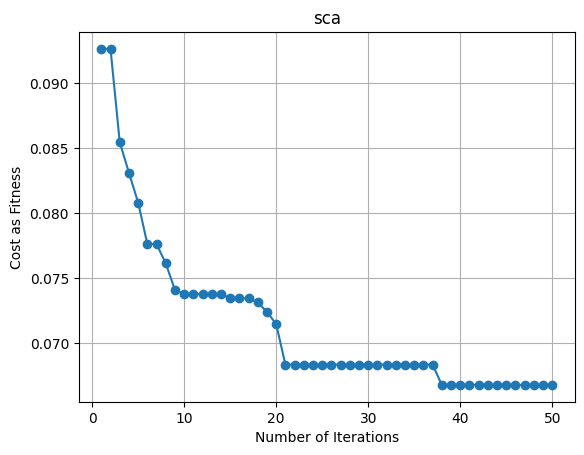

In [12]:
# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Cost as Fitness')
ax.set_title(model_selected)
ax.grid()
plt.show()

**Second model selection and Feature Selection**

In [14]:
# data with selected features from first model
num_train = np.size(xtrain, 0)
x_train   = xtrain[:, sel_feat]
y_train   = ytrain.reshape(num_train)

In [16]:
x_train

array([[ 0.72326799, -0.36521862, -0.70552864, -0.75307402],
       [ 0.72326799, -0.38964738,  0.57229199,  0.54841361],
       [-1.1419013 , -0.27727508, -0.70552864, -0.75307402],
       ...,
       [ 0.72326799, -0.17956004, -0.15789123, -0.28825701],
       [ 0.72326799, -0.4287334 , -0.24916413, -0.38122041],
       [ 0.72326799, -0.17956004, -0.52298283, -0.56714721]])

In [15]:
#import the second MH model
#@title # Select Second Model
import importlib
model2_selected = 'pso' #@param ['pso', 'sca', 'fpa', 'de'] {allow-input: true}
var2 = importlib.import_module(model2_selected)

In [16]:
# split data with reduced feature set into train & validation (80 -- 20)
fxtrain, fxtest, fytrain, fytest = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train)
fold = {'xt':fxtrain, 'yt':fytrain, 'xv':fxtest, 'yv':fytest}

In [17]:
# set parameters:: change the values and update dictionary fields in "smdl_opts"
k    = 5     # k-value in KNN
N    = 10    # number of particles
T    = 3     # maximum number of iterations
w    = 0.9
c1   = 0.5
c2   = 1.5
smdl_opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'c1':1.5, 'c2':2,'w':0.9}

In [18]:
# perform feature selection (second model)
smdl = var2.jfs(x_train, y_train, smdl_opts)

Iteration: 1
Best (PSO): 0.12102477276777752
Iteration: 2
Best (PSO): 0.12102477276777752
Iteration: 3
Best (PSO): 0.10555248618784531
Iteration: 4
Best (PSO): 0.10555248618784531
Iteration: 5
Best (PSO): 0.10555248618784531
Iteration: 6
Best (PSO): 0.10555248618784531
Iteration: 7
Best (PSO): 0.10555248618784531
Iteration: 8
Best (PSO): 0.10555248618784531
Iteration: 9
Best (PSO): 0.10555248618784531
Iteration: 10
Best (PSO): 0.10555248618784531
Iteration: 11
Best (PSO): 0.10555248618784531
Iteration: 12
Best (PSO): 0.10555248618784531
Iteration: 13
Best (PSO): 0.10555248618784531
Iteration: 14
Best (PSO): 0.10555248618784531
Iteration: 15
Best (PSO): 0.10555248618784531
Iteration: 16
Best (PSO): 0.10555248618784531
Iteration: 17
Best (PSO): 0.10555248618784531
Iteration: 18
Best (PSO): 0.10555248618784531
Iteration: 19
Best (PSO): 0.10555248618784531
Iteration: 20
Best (PSO): 0.10555248618784531
Iteration: 21
Best (PSO): 0.10555248618784531
Iteration: 22
Best (PSO): 0.105552486187845

In [19]:
# selected feature list and number of selected features from second model
smdl_sel_feat = smdl['sf']
print("Selected Features:", smdl_sel_feat)
smdl_num_feat = smdl['nf']
print("Feature Size:", smdl_num_feat)

Selected Features: [2]
Feature Size: 1


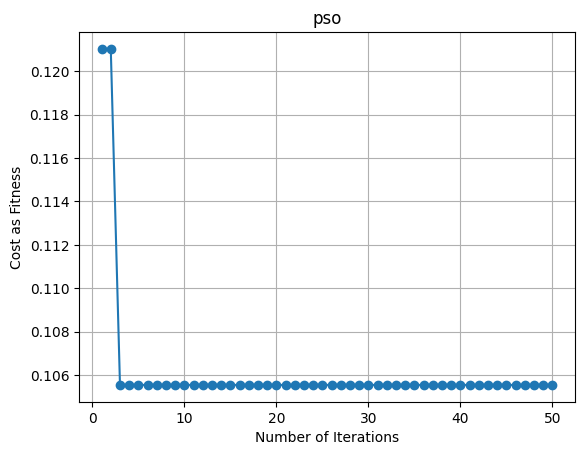

In [20]:
# plot convergence
smdl_curve   = smdl['c']
smdl_curve   = smdl_curve.reshape(np.size(smdl_curve,1))
smdl_x       = np.arange(0, smdl_opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(smdl_x, smdl_curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Cost as Fitness')
ax.set_title(model2_selected)
ax.grid()
plt.show()

**Classification results on Test DataSet**

In [40]:
# Load test data with finally selected features
num_valid = np.size(test_scaled_feat, 0)
x_valid   = test_scaled_feat[:,sel_feat]
y_valid   = test_label.reshape(num_valid)

In [41]:
#classification using J48, Random Forest and SVC using 5-fold cross validation with performance evaluation metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import time

clf1 = DecisionTreeClassifier(criterion = "entropy", random_state = 42, max_depth=3, min_samples_leaf=5)
clf2 = RandomForestClassifier(n_estimators=50, random_state=42)
clf3 = SVC(kernel='linear', probability=True)

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

for clf, label in zip([clf1, clf2], ['J48', 'Random Forest']):
  start_time = time.time()
  scores = cross_validate(clf, x_valid, y_valid, scoring=scoring, cv=5)
  print("Accuracy: %0.4f Precision: %0.4f Recall: %0.4f F-score: %0.4f [%s]" % (scores['test_accuracy'].mean(), scores['test_precision'].mean(), scores['test_recall'].mean(), scores['test_f1_score'].mean(), label))
  end_time = time.time()
  exec_time = end_time - start_time
  print("Time:", exec_time)

Accuracy: 0.8282 Precision: 0.8547 Recall: 0.8513 F-score: 0.8476 [J48]
Time: 0.24645018577575684
Accuracy: 0.8260 Precision: 0.8667 Recall: 0.8354 F-score: 0.8396 [Random Forest]
Time: 11.412903785705566


# flower pollination algorithm

In [28]:
import importlib
model2_selected = 'fpa' #@param ['pso', 'sca', 'fpa', 'de'] {allow-input: true}
var2 = importlib.import_module(model2_selected)

In [29]:
# split data with reduced feature set into train & validation (80 -- 20)
fxtrain, fxtest, fytrain, fytest = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train)
fold = {'xt':fxtrain, 'yt':fytrain, 'xv':fxtest, 'yv':fytest}

In [34]:
# set parameters:: change the values and update dictionary fields in "smdl_opts"
k    = 9     # k-value in KNN
N    = 10    # number of particles
T    = 7     # maximum number of iterations
w    = 0.9
beta   = 1.4    # levy component
P      = 0.2  # switch probability
smdl_opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'c1':1.5, 'c2':2,'w':0.9}

In [35]:
smdl = var2.jfs(x_train, y_train, smdl_opts)

Generation: 1
Best (FPA): 0.10953038674033147
Generation: 2
Best (FPA): 0.10953038674033147
Generation: 3
Best (FPA): 0.10953038674033147
Generation: 4
Best (FPA): 0.10953038674033147
Generation: 5
Best (FPA): 0.10953038674033147
Generation: 6
Best (FPA): 0.10953038674033147
Generation: 7
Best (FPA): 0.10953038674033147


In [36]:
# selected feature list and number of selected features from second model
smdl_sel_feat = smdl['sf']
print("Selected Features:", smdl_sel_feat)
smdl_num_feat = smdl['nf']
print("Feature Size:", smdl_num_feat)

Selected Features: [2]
Feature Size: 1


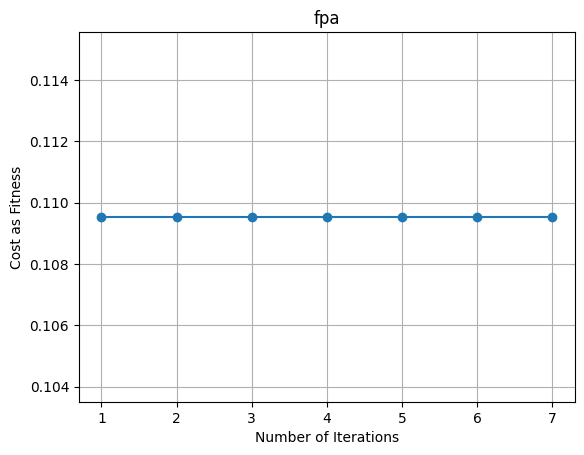

In [37]:
# plot convergence
smdl_curve   = smdl['c']
smdl_curve   = smdl_curve.reshape(np.size(smdl_curve,1))
smdl_x       = np.arange(0, smdl_opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(smdl_x, smdl_curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Cost as Fitness')
ax.set_title(model2_selected)
ax.grid()
plt.show()

In [38]:
# Load test data with finally selected features
num_valid = np.size(test_scaled_feat, 0)
x_valid   = test_scaled_feat[:, smdl_sel_feat]
y_valid   = test_label.reshape(num_valid)

In [39]:
#classification using J48, Random Forest and SVC using 5-fold cross validation with performance evaluation metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import time

clf1 = DecisionTreeClassifier(criterion = "entropy", random_state = 42, max_depth=3, min_samples_leaf=5)
clf2 = RandomForestClassifier(n_estimators=50, random_state=42)
clf3 = SVC(kernel='linear', probability=True)

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

for clf, label in zip([clf1, clf2], ['J48', 'Random Forest']):
  start_time = time.time()
  scores = cross_validate(clf, x_valid, y_valid, scoring=scoring, cv=5)
  print("Accuracy: %0.4f Precision: %0.4f Recall: %0.4f F-score: %0.4f [%s]" % (scores['test_accuracy'].mean(), scores['test_precision'].mean(), scores['test_recall'].mean(), scores['test_f1_score'].mean(), label))
  end_time = time.time()
  exec_time = end_time - start_time
  print("Time:", exec_time)

Accuracy: 0.7363 Precision: 0.8394 Recall: 0.6577 F-score: 0.7345 [J48]
Time: 0.10328006744384766
Accuracy: 0.7422 Precision: 0.7834 Recall: 0.7753 F-score: 0.7714 [Random Forest]
Time: 2.5412867069244385


# Lstm autoencoder

In [13]:
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

In [ ]:
model = autoencoder_model(x_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

In [ ]:
nb_epochs = 100
batch_size = 10
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

In [ ]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()